In [59]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os

In [60]:
#your specified file path
imagePaths = list(paths.list_images('Images'))
knownEncodings = []
knownNames = []

print(imagePaths)

['Images\\Sriram\\IMG_20210403_101907.jpg', 'Images\\Sriram\\IMG_20210403_101915.jpg', 'Images\\Sriram\\IMG_20210403_101917.jpg', 'Images\\Sriram\\IMG_20210403_101919.jpg', 'Images\\Sriram\\IMG_20210403_101921.jpg', 'Images\\Sriram\\IMG_20210403_101924.jpg', 'Images\\Sriram\\sriram.jpg']


In [61]:
for (i, imagePath) in enumerate(imagePaths):
    name = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

In [62]:
data = {"encodings": knownEncodings, "names": knownNames}
print(data)

{'encodings': [array([-0.13925023,  0.1149301 ,  0.1259298 ,  0.01910496, -0.00343181,
       -0.06997918,  0.03061048, -0.04073902,  0.1516878 , -0.01173011,
        0.21591766, -0.04032761, -0.23574013, -0.13770893,  0.08768596,
        0.12724741, -0.10770105, -0.08220164,  0.01092249, -0.07982671,
        0.02984343,  0.00324398,  0.00843927,  0.16057235, -0.07547837,
       -0.38513121, -0.08522229, -0.14863114,  0.02721736, -0.09991058,
       -0.05025923,  0.07702903, -0.1090426 , -0.02370352, -0.0669633 ,
        0.07379948,  0.02556347, -0.09031876,  0.14632985,  0.05314435,
       -0.11069658, -0.09566651, -0.07692082,  0.26828685,  0.11348758,
        0.02619383,  0.08487093,  0.02584519,  0.0401193 , -0.17509958,
        0.00471109,  0.13902792,  0.07111607, -0.01813911,  0.02528663,
       -0.14589557, -0.03962337,  0.03140217, -0.25328058,  0.05260563,
       -0.00713092, -0.11280497, -0.10067859, -0.06983317,  0.21844296,
        0.1420919 , -0.10176162, -0.05064484,  0.

In [63]:
#encoding matrix predicted from image
pred_data = data["encodings"][0]

#encoding matrix obtained from instance image
img = cv2.imread("sriram.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
loc = face_recognition.face_locations(gray,model='hog')
test_data = face_recognition.face_encodings(gray, loc)
test_data = test_data[0]

print("Predicted : ",pred_data)
print("Shape : ",pred_data.shape)

print("Test : ",test_data)
print("Shape : ",test_data.shape)

Predicted :  [-0.13925023  0.1149301   0.1259298   0.01910496 -0.00343181 -0.06997918
  0.03061048 -0.04073902  0.1516878  -0.01173011  0.21591766 -0.04032761
 -0.23574013 -0.13770893  0.08768596  0.12724741 -0.10770105 -0.08220164
  0.01092249 -0.07982671  0.02984343  0.00324398  0.00843927  0.16057235
 -0.07547837 -0.38513121 -0.08522229 -0.14863114  0.02721736 -0.09991058
 -0.05025923  0.07702903 -0.1090426  -0.02370352 -0.0669633   0.07379948
  0.02556347 -0.09031876  0.14632985  0.05314435 -0.11069658 -0.09566651
 -0.07692082  0.26828685  0.11348758  0.02619383  0.08487093  0.02584519
  0.0401193  -0.17509958  0.00471109  0.13902792  0.07111607 -0.01813911
  0.02528663 -0.14589557 -0.03962337  0.03140217 -0.25328058  0.05260563
 -0.00713092 -0.11280497 -0.10067859 -0.06983317  0.21844296  0.1420919
 -0.10176162 -0.05064484  0.19301541 -0.15393461 -0.03901505  0.02221542
 -0.12053358 -0.17044497 -0.22632432  0.12267815  0.34299934  0.14244539
 -0.16664122  0.02504197 -0.13000289 -0

In [64]:
from sklearn.metrics import roc_auc_score

In [65]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [66]:
auc = roc_auc_score_multiclass(test_data, pred_data)
print(auc)

{-0.1543523073196411: 0.5, 0.10085627436637878: 0.5, -0.043980587273836136: 0.5, 0.11571688950061798: 0.5, -0.012446950189769268: 0.5, -0.07386607676744461: 0.5, -0.01470918022096157: 0.5, -0.04480578377842903: 0.5, 0.133154034614563: 0.5, -0.03459492325782776: 0.5, 0.26572370529174805: 0.5, -0.06559550017118454: 0.5, -0.21382133662700653: 0.5, -0.08841588348150253: 0.5, 0.01048257015645504: 0.5, 0.07028941065073013: 0.5, -0.02148052677512169: 0.5, -0.031412187963724136: 0.5, -0.03646199777722359: 0.5, -0.04793417081236839: 0.5, -0.02242552861571312: 0.5, -0.04224271699786186: 0.5, 0.03427070751786232: 0.5, -0.11324197053909302: 0.5, 0.019135577604174614: 0.5, 0.09847038239240646: 0.5, -0.12763305008411407: 0.5, -0.03540928661823273: 0.5, -0.06454308331012726: 0.5, 0.10297974199056625: 0.5, 0.08154020458459854: 0.5, -0.008134981617331505: 0.5, 0.3296835124492645: 0.5, -0.06737102568149567: 0.5, -0.084404356777668: 0.5, 0.06717762351036072: 0.5, -0.015284921042621136: 0.5, -0.0699578374

In [90]:
import numpy as np

pred_class = pred_data.copy()
print(pred_class)

cutoff = (min(pred_class) + max(pred_class))/2

for i in range(0,len(pred_class)) : 
    if pred_class[i] >= cutoff :
        pred_class[i] = 1
    else :
        pred_class[i] = 0

print(pred_class)

[-0.13925023  0.1149301   0.1259298   0.01910496 -0.00343181 -0.06997918
  0.03061048 -0.04073902  0.1516878  -0.01173011  0.21591766 -0.04032761
 -0.23574013 -0.13770893  0.08768596  0.12724741 -0.10770105 -0.08220164
  0.01092249 -0.07982671  0.02984343  0.00324398  0.00843927  0.16057235
 -0.07547837 -0.38513121 -0.08522229 -0.14863114  0.02721736 -0.09991058
 -0.05025923  0.07702903 -0.1090426  -0.02370352 -0.0669633   0.07379948
  0.02556347 -0.09031876  0.14632985  0.05314435 -0.11069658 -0.09566651
 -0.07692082  0.26828685  0.11348758  0.02619383  0.08487093  0.02584519
  0.0401193  -0.17509958  0.00471109  0.13902792  0.07111607 -0.01813911
  0.02528663 -0.14589557 -0.03962337  0.03140217 -0.25328058  0.05260563
 -0.00713092 -0.11280497 -0.10067859 -0.06983317  0.21844296  0.1420919
 -0.10176162 -0.05064484  0.19301541 -0.15393461 -0.03901505  0.02221542
 -0.12053358 -0.17044497 -0.22632432  0.12267815  0.34299934  0.14244539
 -0.16664122  0.02504197 -0.13000289 -0.01924819  0.

In [91]:
test_class = test_data.copy()
print(test_class)

cutoff = (min(test_class) + max(test_class))/2

for i in range(0,len(test_class)) : 
    if test_class[i] >= cutoff :
        test_class[i] = 1
    else:
        test_class[i] = 0

print(test_class)

[-0.15435231  0.10085627  0.11571689 -0.01244695 -0.04398059 -0.07386608
 -0.01470918 -0.04480578  0.13315403 -0.03459492  0.26572371 -0.0655955
 -0.21382134 -0.08841588  0.01048257  0.07028941 -0.13457467 -0.03543827
 -0.01242256 -0.08598792  0.07002567  0.04070805  0.0095464   0.05259836
 -0.06505077 -0.421397   -0.0745168  -0.1136293   0.00965427 -0.11324197
  0.01913558  0.09847038 -0.12763305 -0.03540929 -0.06454308  0.10297974
 -0.03141219 -0.01818428  0.10567966  0.00115037 -0.09208116 -0.12763859
 -0.036462    0.28943032  0.18940146  0.0815402  -0.00993328  0.0661958
  0.0124758  -0.21669763 -0.00813498  0.13152227  0.09695708  0.00895396
  0.0859501  -0.07042612 -0.02629188  0.03527787 -0.19138734 -0.01656088
 -0.03537628 -0.12594154 -0.08716215 -0.06209857  0.24390265  0.09648354
 -0.06995784 -0.02148053  0.17860796 -0.14270264 -0.07987712  0.03265216
 -0.12922138 -0.18419528 -0.20906524  0.08113346  0.32968351  0.12083197
 -0.14813831  0.04225071 -0.04793417 -0.02242553  0.0

In [92]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_class, pred_class)
print(cnf_matrix)

[[42  1]
 [12 73]]


In [99]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy : ",ACC[0])

Accuracy :  0.8984375


In [95]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(test_class, pred_class)

TypeError: must be real number, not dict

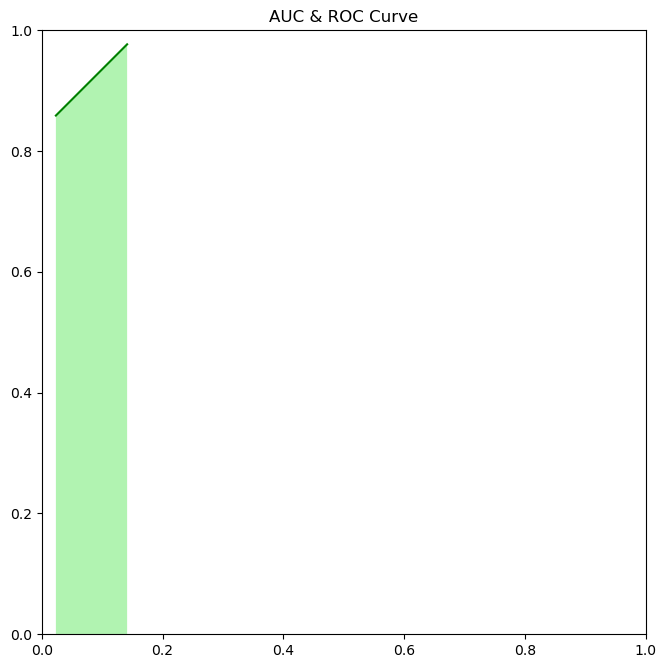

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(FPR, TPR, 'g')
plt.fill_between(FPR, TPR, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()